R2 basic tutorial
=======

In this tutorial you will learn how to use the Python API of R2 (http://www.es.lancs.ac.uk/people/amb/Freeware/R2/R2.htm).
Start by importing the R2 master class from the API.

1 Basics imports
---
Just import basic packages and the R2 API as a module (note : you will need to change the path for it).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
sys.path.append((os.path.relpath('../../api'))) # add here the relative path of the API folder

from R2 import R2


2 Create R2 object, import data and plot pseudo section
----


In [2]:
k = R2('/media/jkl/data/phd/tmp/r2gui/api/test/') # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('/media/jkl/data/phd/tmp/r2gui/api/test/18041712.csv', ftype='Syscal') # read the survey file
print(k.surveys) # the Survey object is stored in a list inside the R2 object

36/344 reciprocal measurements NOT found.
0 measurements error > 20 %


../../api/Survey.py:134: RuntimeWarning: invalid value encountered in greater
  ibad = reciprocalErrRel > 0.2


plotting pseudosection and errors from reciprocal measurements:

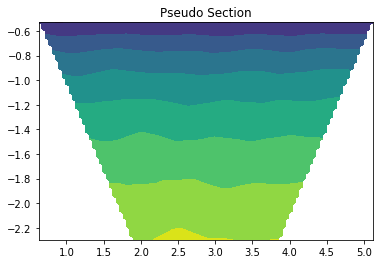

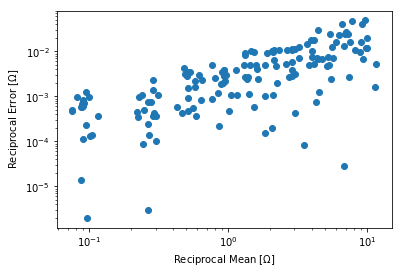

In [3]:
k.pseudo(contour=True)
k.plotError()

We can fit a simple linear model for the errors (```k.linfit()```) or using a linear mixed effect model (```k.lmefit()```):

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simple linear log fit : 
	 offset = -2.655
	 slope = 0.481
R^2 = 0.5064


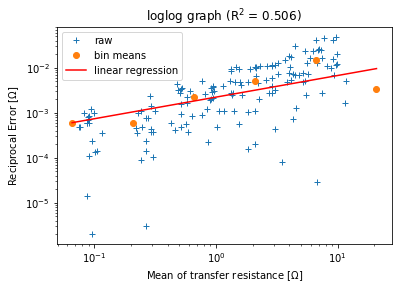

In [4]:
k.linfit(iplot=True)

4 Inversion using R2 wrapper
----

The inversion takes placing in the specify working directory of the R2 object (```R2.setwd()```).
First we create the mesh (quadrilateral by default).


_______mesh summary_______
Number of elements: 5724
Number of nodes: 5886
Attribute title: no attribute
Number of cell vertices: 4
Number of cell attributes: 1
original file path: N/A


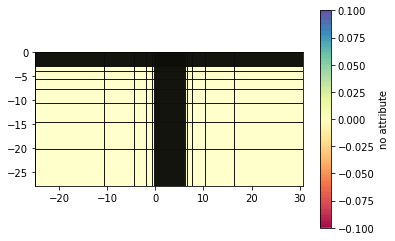

In [5]:
#k.setwd('/media/jkl/data/phd/tmp/r2gui/api/test/') # if you need to respecify a different working directory for inversion
k.createMesh(typ='quad') # generate quadrilateral mesh
k.mesh.summary()
k.mesh.show()

Then we invert the data (the routine to create the ```R2.in```).

123 61


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.1 <<

 >> D a t e : 04 - 06 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   124     Measurements rejected:    30
   Geometric mean of apparent resistivities:  0.22889E+02

 >> Total Memory required is:          1.120 Gb

   Iteration   1
     Initial RMS Misfit:      1330.93     Number of data ignored:     0
     Alpha: 414911.679   RMS Misfit:      486.16
     Alpha: 192584.941   RMS Misfit:      485.42
     Alpha:  89390.011   RMS Misfit:      484.43
     Alpha:  41

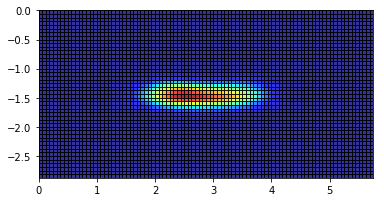

In [6]:
k.invert()

Then we can plot the results (from the vtk file):

importing vtk (2D mesh) file into python workspace...
importing mesh nodes...
importing mesh element info...
quad elements detected
reading cell attributes...
identified relevant table for element attributes...
finished importing mesh.

elapsed 0.32375359535217285


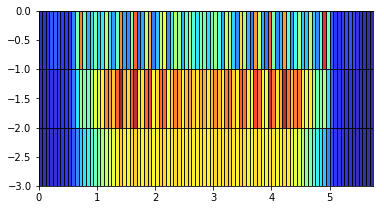

In [9]:
k.showResults()

In a nutshell
---

36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
Using a quadrilateral mesh


../../api/Survey.py:134: RuntimeWarning: invalid value encountered in greater
  ibad = reciprocalErrRel > 0.2


109 54


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.1 <<

 >> D a t e : 04 - 06 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> T r u e - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   124     Measurements rejected:    30
   Geometric mean of apparent resistivities:  0.22889E+02

 >> Total Memory required is:          0.690 Gb

   Iteration   1
     Initial RMS Misfit:      1331.23     Number of data ignored:     0
     Alpha: 414924.580   RMS Misfit:      486.08
     Alpha: 192590.930   RMS Misfit:      485.31
     Alpha:  89392.791   RMS Misfit:      484.29
     Alpha:  41

/usr/local/lib/python3.5/dist-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.5/dist-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


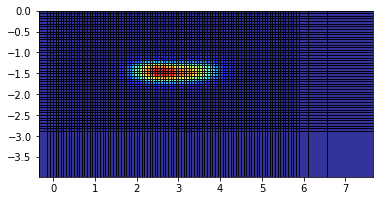

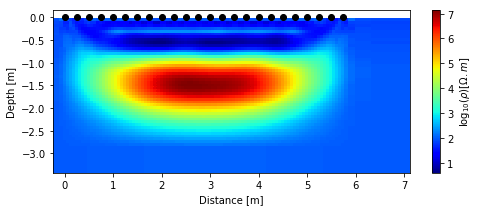

In [7]:
k = R2('/media/jkl/data/phd/tmp/r2gui/api/test/') # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('/media/jkl/data/phd/tmp/r2gui/api/test/18041712.csv', ftype='Syscal') # read the survey file
k.pseudo() # plot pseudo section
k.invert() # does the inversion (generate quand mesh and use default R2.in settings)
k.showSection() # show inverted section